**GOAL:**
    
    To predict the credit card clients who might default

**Analysis Result:**
    
    Sex , Education , Marriage were important features in determining the defaulters
    Clients with High Bill amount and compartively less Last month's payment were more likely to default.
    Clients with Less credit limit and high bill amounts over six months were more prone at defaulting.

**Flow:**  
    
- Logistic Regression
>- With Given Features
>- Making New Features
>- With new features
>- Feature selection 
>-- Ridge , Lasso
- K nearest neighbors Model
- Decison Tree
>- Decision Tree Pre Pruning
>- Decision Tree Post Pruning
- Result after applying different Models

**Importing Libraries**

In [397]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings(action = 'ignore')


df = pd.read_csv("credit.csv")

data = df.copy()

c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
df['Education'] = df['EDUCATION'].map(c)

x = {1:1 , 2:2, 3:3 , 0:3}
df["Marriage"] = df["MARRIAGE"].map(x)

df = df.drop(columns=['EDUCATION' , 'MARRIAGE'])


df = pd.get_dummies(data = df, columns=['Marriage'], drop_first=True)

df = pd.get_dummies(data = df, columns=['SEX'], drop_first=True)

df = pd.get_dummies(data = df, columns=['Education'], drop_first=True)

### Train and test data

In [359]:
#seperating independent and dependent variables
x = df.drop(['default payment next month'], axis=1)
y = df['default payment next month']
x.shape, y.shape

from sklearn.model_selection import train_test_split
train , test = train_test_split(df,stratify=y, random_state = 56)

# cols = train_x.columns


#### Shape of Train and Testing data

In [360]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 27) (22500,)
(7500, 27) (7500,)


#### Applying Logisitc Regression with Default parameters

In [361]:
### Normalising using *standard_scaler*

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

logreg = LogReg(class_weight='balanced')

logreg.fit(train_x, train_y)

train_predict = logreg.predict(train_x)
train_predict

k = f1_score(train_predict, train_y)
print('Training f1_score', k )

test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Training f1_score 0.41125683780399397
Test f1_score     0.4017501988862371


#### Since default penalty at l2 , so checking for No penalty model results 
- Either penalty - 'None'
- Or lambda becomes 0

##### Logisitic penalty parameter to NONE

In [362]:
logreg = LogReg(class_weight='balanced' , penalty='none')

logreg.fit(train_x, train_y)

train_predict = logreg.predict(train_x)
train_predict

k = f1_score(train_predict, train_y)
print('Training f1_score', k )

test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Training f1_score 0.4110469692993965
Test f1_score     0.4017398181099249


#### Logisitc C parameter changes , C = 1/Lambda

In [363]:
logreg = LogReg(class_weight='balanced' , C=10000000000000)

logreg.fit(train_x, train_y)

train_predict = logreg.predict(train_x)
train_predict

k = f1_score(train_predict, train_y)
print('Training f1_score', k )

test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Training f1_score 0.4110469692993965
Test f1_score     0.4017398181099249


**Result** -- Not Much changes on changing parameters , so stick to default values

### New Features

In [398]:
c = {1 :'Graduate School' , 2:'University'  , 3:'High School' , 4:'Others' , 5:'Others', 6:'Others' , 0:'Others'}
data['Education'] = data['EDUCATION'].map(c)

# x = {1:1 , 2:2, 3:3 , 0:3}

In [399]:
#seperating independent and dependent variables
x = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']
x.shape, y.shape


from sklearn.model_selection import train_test_split
train , test = train_test_split(data,stratify=y, random_state = 56)

# cols = train_x.columns
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols = train_x.columns

(22500, 25) (22500,)
(7500, 25) (7500,)


In [400]:
def div(z,x,y):
    try:
        z = x / y
    except ZeroDivisionError:
        z = 0

### Creating New Features on train and test data seperately to avoid Leakage of data

**Binning Age Column**

In [401]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
train["Age_Bin"] = pd.cut(train['AGE'], bins, labels = labels, include_lowest = True)

train = pd.get_dummies(data = train, columns=['Age_Bin'], drop_first=True)

In [402]:
bins = [19 , 30 , 40 , 50 , 60 , 100]
labels = ["Young" , "Adult" , "Mature" , "Old" , "Very Old"]
test["Age_Bin"] = pd.cut(test['AGE'], bins, labels = labels, include_lowest = True)

test = pd.get_dummies(data = test, columns=['Age_Bin'], drop_first=True)

**Working with credit card payment columns**
- credit card limit 
- months bill 
- months prevous payments 
- how was payment paid (on time or how much late)

In [403]:
train["Pay_Sum"] = train["PAY_0"] + train["PAY_2"] + train["PAY_3"] + train["PAY_4"] + train["PAY_5"] + train["PAY_6"]
train["Bill_Amt_Sum"] = train["BILL_AMT1"] + train["BILL_AMT2"] +train["BILL_AMT3"]+train["BILL_AMT4"]+train["BILL_AMT5"]+train["BILL_AMT6"]
train["Bill_Amt_Avg"] = train["Bill_Amt_Sum"]/6
train["Pay_Amt_Sum"] = train["PAY_AMT1"] + train["PAY_AMT2"] + train["PAY_AMT3"] + train["PAY_AMT4"] + train["PAY_AMT5"] + train["PAY_AMT6"]
train["Pay_Amt_Avg"] = train["Pay_Amt_Sum"]/6
train["Weight_Bill_Avg"] = (train["PAY_0"]*train["BILL_AMT1"] + train["PAY_2"]*train["BILL_AMT2"] + train["PAY_3"]*train["BILL_AMT3"] + train["PAY_4"]*train["BILL_AMT4"] + train["PAY_5"]*train["BILL_AMT5"] + train["PAY_6"]*train["BILL_AMT6"]) / 6
train["Weight_Pay_avg"] = (train["PAY_0"]*train["PAY_AMT1"] + train["PAY_2"]*train["PAY_AMT2"] + train["PAY_3"]*train["PAY_AMT3"] + train["PAY_4"]*train["PAY_AMT4"] + train["PAY_5"]*train["PAY_AMT5"] + train["PAY_6"]*train["PAY_AMT6"] ) / 6
train["Unweight_Bill_Avg"] = (train["Pay_Sum"]*train["Bill_Amt_Sum"])/6
train["Unweight_Pay_Avg"] = (train["Pay_Sum"]*train["Pay_Amt_Sum"])/6
train["lim_Avg"] = (train["Weight_Bill_Avg"]*6 / train["LIMIT_BAL"])*100
train["pay_over_bill"] = 0
div(train["pay_over_bill"] , train["Bill_Amt_Avg"] , train["Pay_Amt_Avg"])

In [405]:
test["Pay_Sum"] = test["PAY_0"] + test["PAY_2"] + test["PAY_3"] + test["PAY_4"] + test["PAY_5"] + test["PAY_6"]
test["Bill_Amt_Sum"] = test["BILL_AMT1"] + test["BILL_AMT2"] +test["BILL_AMT3"]+test["BILL_AMT4"]+test["BILL_AMT5"]+test["BILL_AMT6"]
test["Bill_Amt_Avg"] = test["Bill_Amt_Sum"]/6
test["Pay_Amt_Sum"] = test["PAY_AMT1"] + test["PAY_AMT2"] + test["PAY_AMT3"] + test["PAY_AMT4"] + test["PAY_AMT5"] + test["PAY_AMT6"]
test["Pay_Amt_Avg"] = test["Pay_Amt_Sum"]/6
test["Weight_Bill_Avg"] = (test["PAY_0"]*test["BILL_AMT1"] + test["PAY_2"]*test["BILL_AMT2"] + test["PAY_3"]*test["BILL_AMT3"] + test["PAY_4"]*test["BILL_AMT4"] + test["PAY_5"]*test["BILL_AMT5"] + test["PAY_6"]*test["BILL_AMT6"]) / 6
test["Weight_Pay_avg"] = (test["PAY_0"]*test["PAY_AMT1"] + test["PAY_2"]*test["PAY_AMT2"] + test["PAY_3"]*test["PAY_AMT3"] + test["PAY_4"]*test["PAY_AMT4"] + test["PAY_5"]*test["PAY_AMT5"] + test["PAY_6"]*test["PAY_AMT6"] ) / 6
test["Unweight_Bill_Avg"] = (test["Pay_Sum"]*test["Bill_Amt_Sum"])/6
test["Unweight_Pay_Avg"] = (test["Pay_Sum"]*test["Pay_Amt_Sum"])/6
test["lim_Avg"] = (test["Weight_Bill_Avg"]*6 / test["LIMIT_BAL"])*100
test["pay_over_bill"] = 0
div(test["pay_over_bill"]  , test["Bill_Amt_Avg"] , test["Pay_Amt_Avg"]) 

**New Features on basis of :**
- Relating sex and age 
- relating marriage and age
- relating Sex and marriage
- relating credit limit , bill amount and previous payment at once

In [404]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(train[Col1],train[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

train['AgeBin'] = pd.cut(train['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
train['AgeBin'] = pd.to_numeric(train['AgeBin'])
train.loc[(train['AgeBin'] == 6) , 'AgeBin'] = 5


train['SE_AG'] = 0 #creating a column in terms of sex and age
train.loc[((train.SEX == 1) & (train.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
train.loc[((train.SEX == 1) & (train.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
train.loc[((train.SEX == 1) & (train.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
train.loc[((train.SEX == 1) & (train.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
train.loc[((train.SEX == 1) & (train.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
train.loc[((train.SEX == 2) & (train.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
train.loc[((train.SEX == 2) & (train.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
train.loc[((train.SEX == 2) & (train.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
train.loc[((train.SEX == 2) & (train.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
train.loc[((train.SEX == 2) & (train.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

train['SE_MA'] = 0
train.loc[((train.SEX == 1) & (train.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
train.loc[((train.SEX == 1) & (train.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
train.loc[((train.SEX == 2) & (train.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
train.loc[((train.SEX == 2) & (train.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

train['Avg_exp_5'] = ((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5']))) / train['LIMIT_BAL']
train['Avg_exp_4'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4']))) / 2) / train['LIMIT_BAL']
train['Avg_exp_3'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3']))) / 3) / train['LIMIT_BAL']
train['Avg_exp_2'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2']))) / 4) / train['LIMIT_BAL']
train['Avg_exp_1'] = (((train['BILL_AMT5'] - (train['BILL_AMT6'] - train['PAY_AMT5'])) +
                 (train['BILL_AMT4'] - (train['BILL_AMT5'] - train['PAY_AMT4'])) +
                 (train['BILL_AMT3'] - (train['BILL_AMT4'] - train['PAY_AMT3'])) +
                 (train['BILL_AMT2'] - (train['BILL_AMT3'] - train['PAY_AMT2'])) +
                 (train['BILL_AMT1'] - (train['BILL_AMT2'] - train['PAY_AMT1']))) / 5) / train['LIMIT_BAL']


In [406]:
def corr_2_cols(Col1, Col2):
    res = pd.crosstab(test[Col1],test[Col2])
    # res = df1.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

test['AgeBin'] = pd.cut(test['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
test['AgeBin'] = pd.to_numeric(test['AgeBin'])
test.loc[(test['AgeBin'] == 6) , 'AgeBin'] = 5


test['SE_AG'] = 0 #creating a column in terms of sex and age
test.loc[((test.SEX == 1) & (test.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
test.loc[((test.SEX == 1) & (test.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
test.loc[((test.SEX == 1) & (test.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
test.loc[((test.SEX == 1) & (test.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
test.loc[((test.SEX == 1) & (test.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
test.loc[((test.SEX == 2) & (test.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
test.loc[((test.SEX == 2) & (test.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
test.loc[((test.SEX == 2) & (test.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
test.loc[((test.SEX == 2) & (test.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
test.loc[((test.SEX == 2) & (test.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'default payment next month')

test['SE_MA'] = 0
test.loc[((test.SEX == 1) & (test.MARRIAGE == 1)) , 'SE_MA'] = 1 #married man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 2)) , 'SE_MA'] = 2 #single man
test.loc[((test.SEX == 1) & (test.MARRIAGE == 3)) , 'SE_MA'] = 3 #divorced man
test.loc[((test.SEX == 2) & (test.MARRIAGE == 1)) , 'SE_MA'] = 4 #married woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 2)) , 'SE_MA'] = 5 #single woman
test.loc[((test.SEX == 2) & (test.MARRIAGE == 3)) , 'SE_MA'] = 6 #divorced woman
corr_2_cols('SE_MA', 'default payment next month')

## calculating Average expense from bill amount of previous and this month and the pay amount , dividing by limit balance

test['Avg_exp_5'] = ((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5']))) / test['LIMIT_BAL']
test['Avg_exp_4'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4']))) / 2) / test['LIMIT_BAL']
test['Avg_exp_3'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3']))) / 3) / test['LIMIT_BAL']
test['Avg_exp_2'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2']))) / 4) / test['LIMIT_BAL']
test['Avg_exp_1'] = (((test['BILL_AMT5'] - (test['BILL_AMT6'] - test['PAY_AMT5'])) +
                 (test['BILL_AMT4'] - (test['BILL_AMT5'] - test['PAY_AMT4'])) +
                 (test['BILL_AMT3'] - (test['BILL_AMT4'] - test['PAY_AMT3'])) +
                 (test['BILL_AMT2'] - (test['BILL_AMT3'] - test['PAY_AMT2'])) +
                 (test['BILL_AMT1'] - (test['BILL_AMT2'] - test['PAY_AMT1']))) / 5) / test['LIMIT_BAL']


### Total Features : 57

- Making dummies of necessary features
- Splitting data as train_x and train_y and same for test

In [408]:
train = pd.get_dummies(data = train, columns=['SEX'], drop_first=True)

In [409]:
train = pd.get_dummies(data = train, columns=['EDUCATION'], drop_first=True)
train = pd.get_dummies(data = train, columns=['Education'], drop_first=True)
train = pd.get_dummies(data = train, columns=['MARRIAGE'], drop_first=True)

In [410]:
test = pd.get_dummies(data = test, columns=['SEX'], drop_first=True)
test = pd.get_dummies(data = test, columns=['EDUCATION'], drop_first=True)
test = pd.get_dummies(data = test, columns=['Education'], drop_first=True)
test = pd.get_dummies(data = test, columns=['MARRIAGE'], drop_first=True)

In [411]:

#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

cols2 = train_x.columns

(22500, 57) (22500,)
(7500, 57) (7500,)


#### Logistic model with all features

In [412]:
### Normalising using *standard_scaler*

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

logreg = LogReg(class_weight='balanced')

logreg.fit(train_x, train_y)

train_predict = logreg.predict(train_x)
train_predict

k = f1_score(train_predict, train_y)
print('Training f1_score', k )

test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Training f1_score 0.49907219227710514
Test f1_score     0.4967602591792656


#### Hand - Picking out features ( causing multicollinearity) and running model

In [414]:
drop2 = ['ID' , 'AGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' , 'Bill_Amt_Sum' , 'Pay_Amt_Sum' , 'Pay_Sum' , 'LIMIT_BAL']

train3 = train.drop(columns=drop2 , axis=1)
test3 = test.drop(columns=drop2 , axis=1)

In [415]:
#seperating independent and dependent variables
train3_x = train3.drop(['default payment next month'], axis=1)
train3_y = train3['default payment next month']
print(train3_x.shape, train3_y.shape)

#seperating independent and dependent variables
test3_x = test3.drop(['default payment next month'], axis=1)
test3_y = test3['default payment next month']
print(test3_x.shape, test3_y.shape)

cols3 = train3_x.columns

scaler = StandardScaler()

train3_x_scaled = scaler.fit_transform(train3_x)

test3_x_scaled = scaler.transform(test3_x)

from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

logreg = LogReg(class_weight='balanced')

logreg.fit(train3_x, train3_y)

train3_predict = logreg.predict(train3_x)
train3_predict

k = f1_score(train3_predict, train3_y)
print('train3ing f1_score', k )

test3_predict = logreg.predict(test3_x)
k = f1_score(test3_predict, test3_y)
print('test3 f1_score    ', k )

(22500, 33) (22500,)
(7500, 33) (7500,)
train3ing f1_score 0.5239379009017383
test3 f1_score     0.5182440136830103


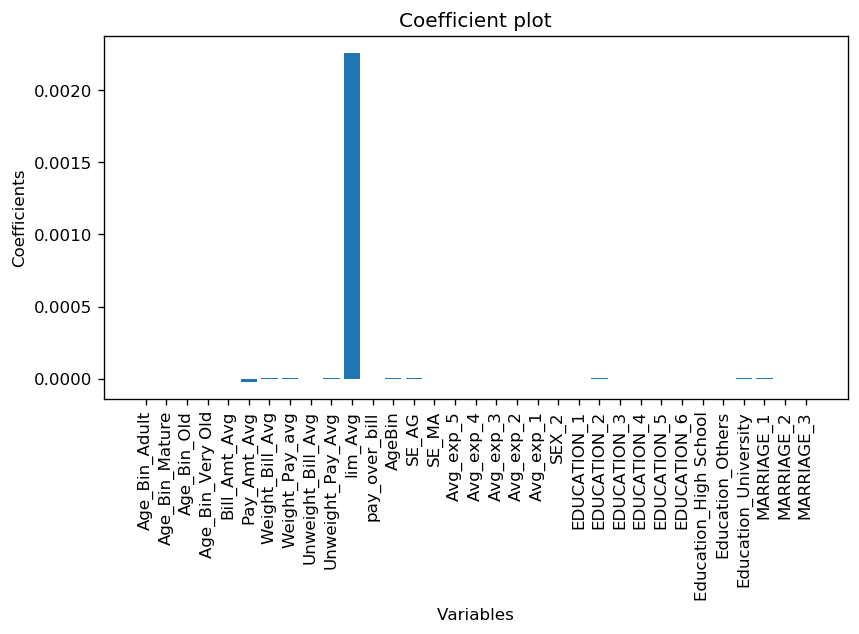

In [416]:
plt.figure(figsize=(8,4), dpi=120, facecolor='w', edgecolor='b')
x = cols3
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.xticks(rotation = 90)
plt.show()

#### Feature Selection

In [417]:
from sklearn.feature_selection import SelectFromModel

In [418]:
from sklearn.linear_model import LogisticRegression

In [419]:
sel = SelectFromModel(LogisticRegression(penalty='l2' , class_weight='balanced', solver='liblinear'))
sel.fit(train_x, train_y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [420]:
selected_feat = train_x.columns[(sel.get_support())]
print('total features: {}'.format((train_x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel.estimator_.coef_ == 0)))

total features: 57
selected features: 4
features with coefficients shrank to zero: 1


In [422]:
removed_feats = train_x.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['pay_over_bill'], dtype='object')

### Selected Feat

In [421]:
selected_feat

Index(['AGE', 'PAY_0', 'Pay_Sum', 'lim_Avg'], dtype='object')

#### Running Logisitic after feature selection with default values

In [423]:
rid_train = train.drop(columns=removed_feats , axis=1)
rid_train = rid_train[['AGE', 'PAY_0', 'Pay_Sum', 'lim_Avg' , 'default payment next month']]
rid_test = test.drop(columns=removed_feats , axis=1)
rid_test = rid_test[['AGE', 'PAY_0', 'Pay_Sum', 'lim_Avg' , 'default payment next month']]

In [424]:
rid_train_x = rid_train.drop(['default payment next month'], axis=1)
rid_train_y = rid_train['default payment next month']
print(rid_train_x.shape, rid_train_y.shape)

#seperating independent and dependent variables
rid_test_x = rid_test.drop(['default payment next month'], axis=1)
rid_test_y = rid_test['default payment next month']
print(rid_test_x.shape, rid_test_y.shape)

cols4 = rid_train_x.columns

scaler = StandardScaler()

rid_train_x_scaled = scaler.fit_transform(rid_train_x)

rid_test_x_scaled = scaler.transform(rid_test_x)
logreg = LogReg(class_weight='balanced')

logreg.fit(rid_train_x, rid_train_y)

rid_train_predict = logreg.predict(rid_train_x)
k = f1_score(rid_train_predict, rid_train_y)
print('rid_training f1_score', k )

rid_test_predict = logreg.predict(rid_test_x)
k = f1_score(rid_test_predict, rid_test_y)
print('rid_test f1_score    ', k )

(22500, 4) (22500,)
(7500, 4) (7500,)
rid_training f1_score 0.5185804533630621
rid_test f1_score     0.5109243697478991


#### Selecting features for Lasso Regression

In [425]:
sel = SelectFromModel(LogisticRegression(penalty='l1' , class_weight='balanced', solver='liblinear'))
sel.fit(train_x, train_y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [426]:
selected_feat = train_x.columns[(sel.get_support())]
print('total features: {}'.format((train_x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel.estimator_.coef_ == 0)))

total features: 57
selected features: 29
features with coefficients shrank to zero: 7


### Selected Features and Removed

In [427]:
selected_feat

Index(['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Age_Bin_Adult', 'Age_Bin_Mature', 'Age_Bin_Old', 'Pay_Sum',
       'Pay_Amt_Avg', 'lim_Avg', 'AgeBin', 'SE_AG', 'SE_MA', 'Avg_exp_5',
       'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_5', 'EDUCATION_6', 'Education_Others',
       'Education_University', 'MARRIAGE_1', 'MARRIAGE_3'],
      dtype='object')

In [428]:
removed_feats = train_x.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['Age_Bin_Very Old', 'pay_over_bill', 'Avg_exp_2', 'EDUCATION_3',
       'EDUCATION_4', 'Education_High School', 'MARRIAGE_2'],
      dtype='object')

**Running Logistic with selected features**

In [429]:
# lass_train = train.drop(columns=removed_feats , axis=1)
lass_train = train[['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Age_Bin_Adult', 'Age_Bin_Mature', 'Age_Bin_Old', 'Pay_Sum',
       'Pay_Amt_Avg', 'lim_Avg', 'AgeBin', 'SE_AG', 'SE_MA', 'Avg_exp_5',
       'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_5', 'EDUCATION_6', 'Education_Others',
       'Education_University', 'MARRIAGE_1', 'MARRIAGE_3', 'default payment next month']]
# lass_test = test.drop(columns=removed_feats , axis=1)
lass_test = test[['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Age_Bin_Adult', 'Age_Bin_Mature', 'Age_Bin_Old', 'Pay_Sum',
       'Pay_Amt_Avg', 'lim_Avg', 'AgeBin', 'SE_AG', 'SE_MA', 'Avg_exp_5',
       'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_5', 'EDUCATION_6', 'Education_Others',
       'Education_University', 'MARRIAGE_1', 'MARRIAGE_3', 'default payment next month']]

In [430]:
lass_train_x = lass_train.drop(['default payment next month'], axis=1)
lass_train_y = lass_train['default payment next month']
print(lass_train_x.shape, lass_train_y.shape)

#seperating independent and dependent variables
lass_test_x = lass_test.drop(['default payment next month'], axis=1)
lass_test_y = lass_test['default payment next month']
print(lass_test_x.shape, lass_test_y.shape)

cols4 = lass_train_x.columns

scaler = StandardScaler()

lass_train_x_scaled = scaler.fit_transform(lass_train_x)

lass_test_x_scaled = scaler.transform(lass_test_x)
logreg = LogReg(class_weight='balanced')

logreg.fit(lass_train_x, lass_train_y)

lass_train_predict = logreg.predict(lass_train_x)
k = f1_score(lass_train_predict, lass_train_y)
print('lass_training f1_score', k )

lass_test_predict = logreg.predict(lass_test_x)
k = f1_score(lass_test_predict, lass_test_y)
print('lass_test f1_score    ', k )

(22500, 29) (22500,)
(7500, 29) (7500,)
lass_training f1_score 0.5158650786435132
lass_test f1_score     0.5072662462297779


In [432]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(lass_test_predict, lass_test_y)
print(cf)

[[4778  734]
 [1063  925]]


## Now that we have lasso logisitc regression working the best , with selected features


In [431]:
selected_feat

Index(['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'Age_Bin_Adult', 'Age_Bin_Mature', 'Age_Bin_Old', 'Pay_Sum',
       'Pay_Amt_Avg', 'lim_Avg', 'AgeBin', 'SE_AG', 'SE_MA', 'Avg_exp_5',
       'Avg_exp_4', 'Avg_exp_3', 'Avg_exp_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_5', 'EDUCATION_6', 'Education_Others',
       'Education_University', 'MARRIAGE_1', 'MARRIAGE_3'],
      dtype='object')

--- 

**we would look into threshold value for f1_score**

---

In [433]:
from sklearn.metrics import precision_recall_curve

In [434]:
precision, recall, threshold = precision_recall_curve(lass_test_y, logreg.predict_proba(lass_test_x)[:,1])
precision.shape , recall.shape , threshold.shape

((7454,), (7454,), (7453,))

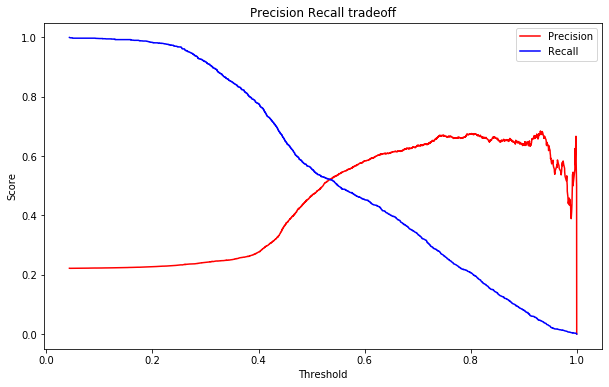

In [435]:
plt.figure(figsize=(10,6))
plt.plot(threshold , precision[:-1] , color='red' , label='Precision')
plt.plot(threshold , recall[:-1] , color='blue' , label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision Recall tradeoff")
plt.legend()

### Threshold value comes to be 0.55

In [443]:
# Predicting over the Train
lass_train_pred = logreg.predict_proba(lass_train_x)
train_pred1= lass_train_pred[:,1]

for i in range(0, len(train_pred1)):
  if(train_pred1[i]>0.55):
    train_pred1[i] = 1
  else:
    train_pred1[i] = 0  
 
k1 = f1_score(train_pred1, lass_train_y)
print('Training f1_score', k1 )


Training f1_score 0.5289103419944542


In [444]:
lass_test_pred = logreg.predict_proba(lass_test_x)
test_pred1= lass_test_pred[:,1]

for i in range(0, len(test_pred1)):
  if(test_pred1[i]>0.55):
    test_pred1[i] = 1
  else:
    test_pred1[i] = 0  
 
k1 = f1_score(test_pred1, lass_test_y)
print('Testing f1_score', k1 )


Testing f1_score 0.5184029943855272


#### Classification Report

In [445]:
from sklearn.metrics import classification_report as rep
print(rep(lass_test_y , test_pred1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5841
           1       0.54      0.50      0.52      1659

    accuracy                           0.79      7500
   macro avg       0.70      0.69      0.69      7500
weighted avg       0.79      0.79      0.79      7500



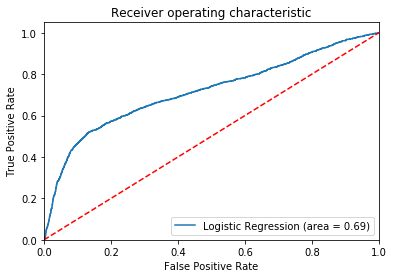

In [446]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(lass_test_y, logreg.predict(lass_test_x))
fpr, tpr, thresholds = roc_curve(lass_test_y, logreg.predict_proba(lass_test_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### K-Nearest Neighbors

In [447]:
#seperating independent and dependent variables
train_x = train.drop(['default payment next month'], axis=1)
train_y = train['default payment next month']
print(train_x.shape, train_y.shape)

#seperating independent and dependent variables
test_x = test.drop(['default payment next month'], axis=1)
test_y = test['default payment next month']
print(test_x.shape, test_y.shape)

col = train_x.columns

(22500, 57) (22500,)
(7500, 57) (7500,)


In [448]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

In [449]:
# from sklearn.model_selection import train_test_split
x_train ,x_val, y_train ,y_val  = train_test_split(train_x, train_y, random_state = 96, stratify=train_y)
print(x_train.shape , y_train.shape)
print(x_val.shape , y_val.shape)

(16875, 57) (16875,)
(5625, 57) (5625,)


In [450]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [451]:
from sklearn.metrics import classification_report

#### Running basic KNN with k fold cross validation

In [452]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

score = cross_val_score( KNN(n_neighbors = 4),X = train_x, y = train_y ,scoring="f1", cv = 7 , n_jobs=-1)
score

array([0.34774067, 0.36346154, 0.322     , 0.36363636, 0.33996024,
       0.28827038, 0.34234234])

In [453]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(33.82016469598366, 2.435406351104236)

#### Checking optimum value for Neighbor

In [454]:
def Val_score(n_neighbors):
   
    avg = []
    std = []
  
    for i in n_neighbors:
      score = cross_val_score(KNN(n_neighbors = i) , X = train_x, y = train_y,scoring="f1", cv = 7 , n_jobs=-1)
      
    # adding mean to avg list
      avg.append(score.mean())
      
    # adding standard deviation to std list
      std.append(score.std())
      
    return avg, std

In [455]:
n_neighbors = range(1,20)
mean, std = Val_score(n_neighbors) 

Text(0.5, 1.0, 'Mean Validation score')

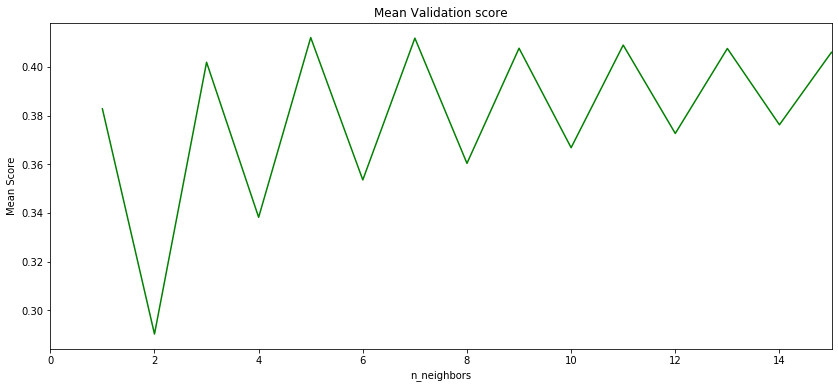

In [456]:
plt.figure(figsize=(14,6))
plt.plot(n_neighbors, mean, color = 'green', label = 'mean_train' )
# plt.plot(n_neighbors, mean1, color = 'red', label = 'mean_val' )
plt.xlabel('n_neighbors')
plt.xlim(0,15)
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

#### Good neighbor values are 5, 7 ,9 from looking at the graph

Text(0.5, 1.0, 'Standard Deviation of Validation score')

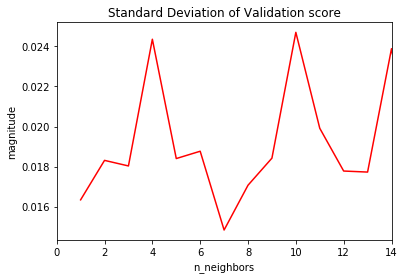

In [457]:
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.xlim(0,14)
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')


##### Since we have lowest std deviation at 7 

- Checking model neighbor at 5

In [461]:
### Trying the optimal model over test set
clf = KNN(n_neighbors = 5)
clf.fit(train_x, train_y)
train_pred = clf.predict(train_x)
score1 = f1_score(train_pred, train_y)
test_pred = clf.predict(test_x)
score2 = f1_score(test_pred, test_y)
score1 , score2

(0.5548450565666502, 0.4067300658376006)

**Result**
- Neighbor = 7 is optimum

In [458]:
### Trying the optimal model over test set
clf = KNN(n_neighbors = 7)
clf.fit(train_x, train_y)
train_pred = clf.predict(train_x)
score1 = f1_score(train_pred, train_y)
test_pred = clf.predict(test_x)
score2 = f1_score(test_pred, test_y)

In [460]:
score1 , score2

(0.5154457193292145, 0.41415270018621975)

# Decision Tree

In [462]:
# from sklearn.model_selection import train_test_split
x_train ,x_val, y_train ,y_val  = train_test_split(train_x, train_y, random_state = 96, stratify=train_y)
col=x_train.columns

In [463]:
print(x_train.shape , y_train.shape , x_val.shape , y_val.shape)

(16875, 57) (16875,) (5625, 57) (5625,)


In [464]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [465]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [466]:
#creating the decision tree function
dt = DecisionTreeClassifier(class_weight= 'balanced' , random_state=10)

In [467]:
#fitting the model
dt.fit(x_train, y_train)
pred_train = dt.predict(x_train)
pred_val = dt.predict(x_val)

In [468]:
from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(1.0, 0.3934687375547591)

In [469]:
from sklearn import tree

Text(0.5, 1.0, 'Tree')

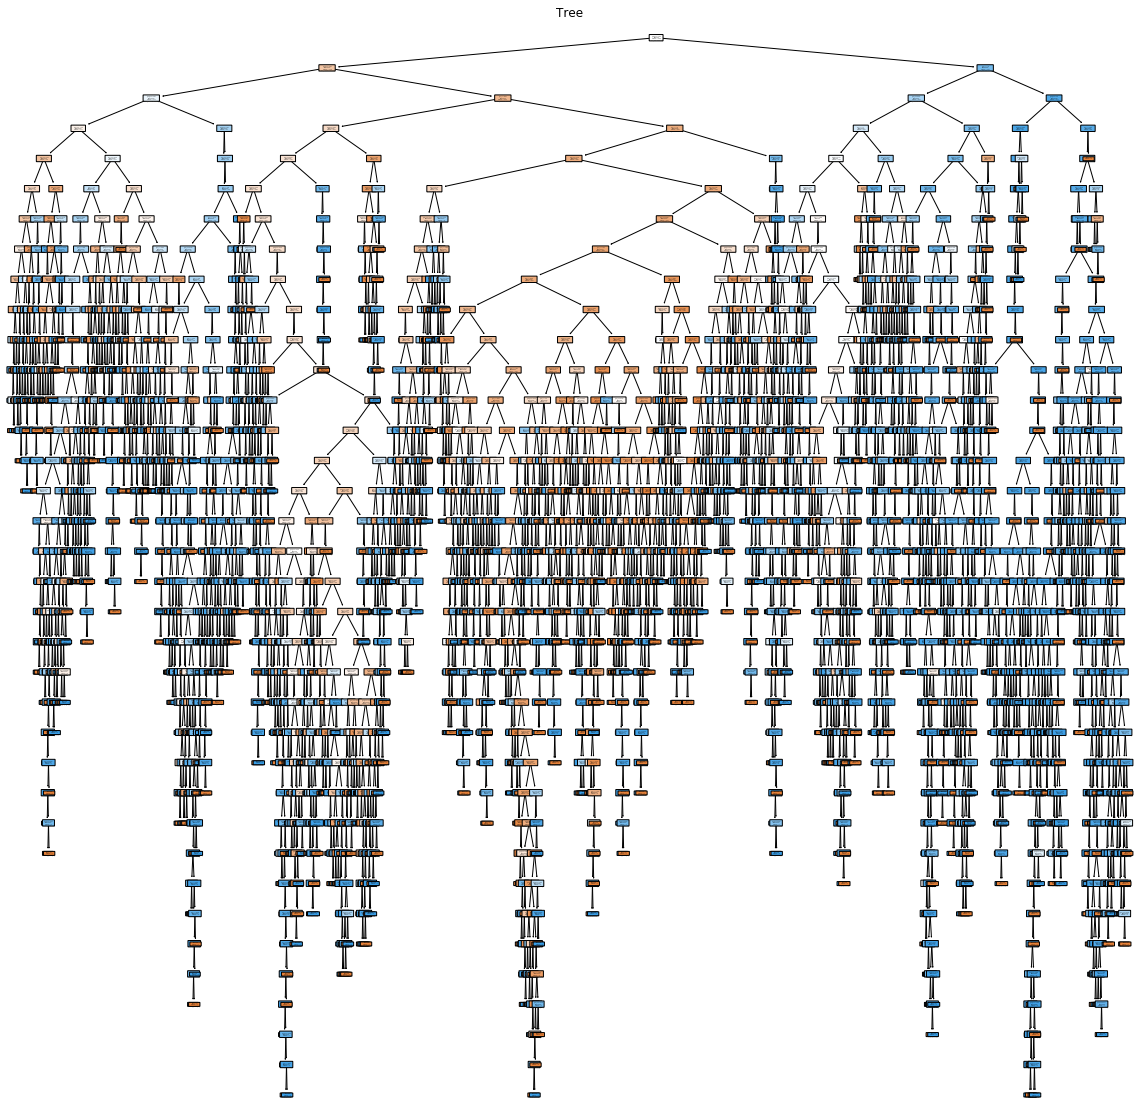

In [470]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, rounded=True , filled=True)
plt.title("Tree")

#### Max depth on running default decision tree

In [471]:
dt.get_depth()

35

### Pre-Pruning Decision Tree

#### Tuning the max_depth

In [472]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt1 = DecisionTreeClassifier(class_weight='balanced',max_depth=depth, random_state=10)
    dt1.fit(x_train, y_train)
    pred_train = dt1.predict(x_train)
    pred_val = dt1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [473]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,0.512355,0.517831
1,2,0.504929,0.516944
2,3,0.525616,0.532459
3,4,0.523121,0.528554
4,5,0.541299,0.534770
5,6,0.562182,0.542920
6,7,0.569164,0.540578
7,8,0.577866,0.525385
8,9,0.605836,0.521295
9,10,0.618266,0.510848


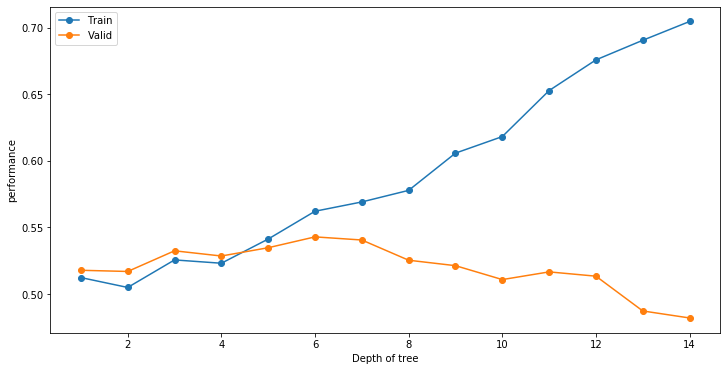

In [474]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

#### Max_depth = 6 is good choice looking at graph

In [475]:
dt1 = DecisionTreeClassifier(class_weight="balanced",max_depth = 6 , random_state=10)

In [476]:
#fitting the model
dt1.fit(x_train, y_train)
pred_train = dt1.predict(x_train)
pred_val = dt1.predict(x_val)

- **Running Decision tree after tuning max_depth**

In [477]:
from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.5621822690638562, 0.5429200293470287)

Text(0.5, 1.0, 'Tree')

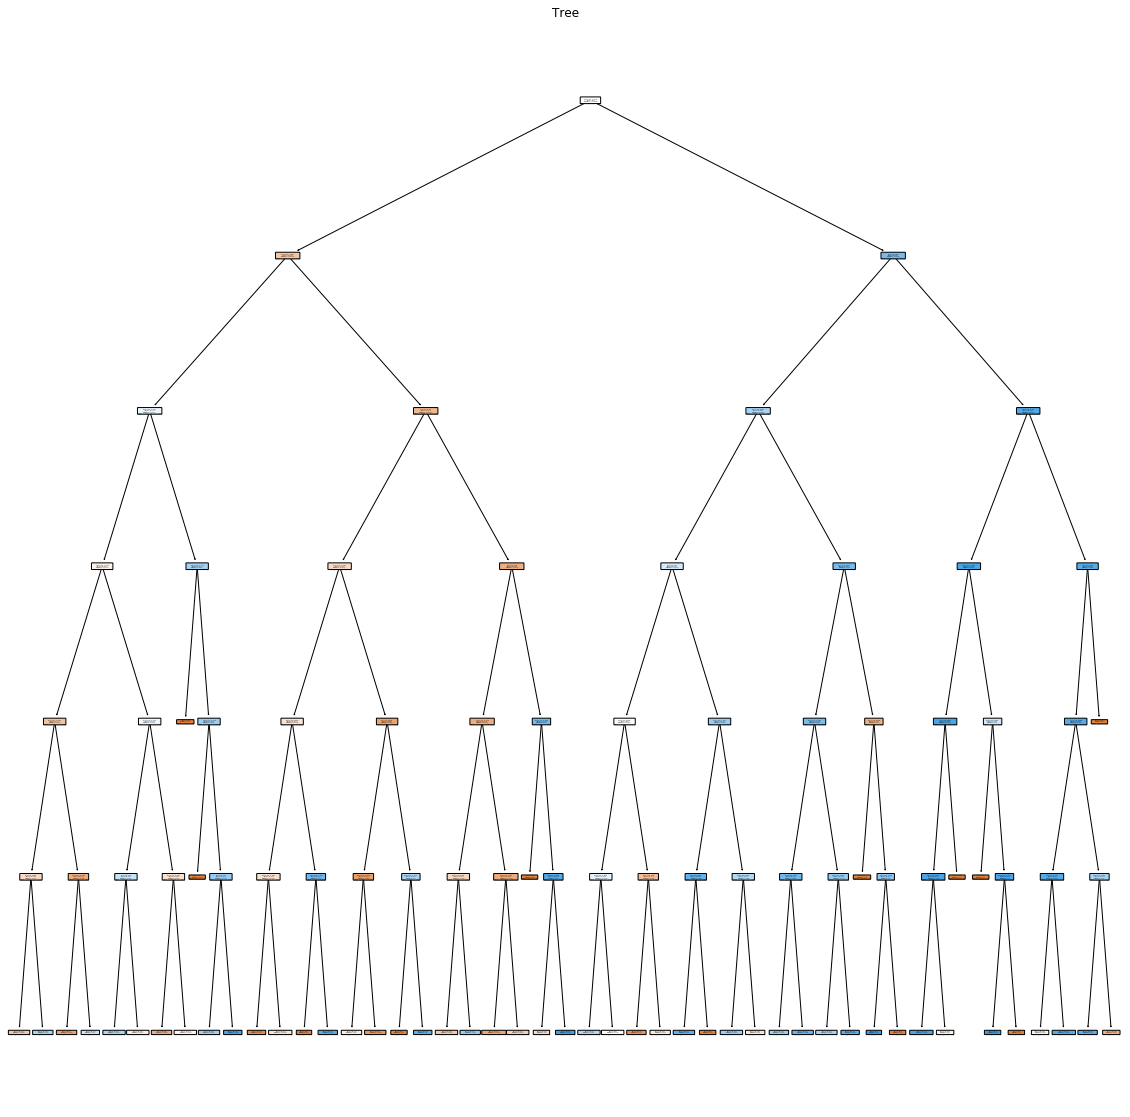

In [478]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt1, rounded=True , filled=True)
plt.title("Tree")

- **Features selected after tuning max_depth**

Text(0.5, 0, 'Feature Importance')

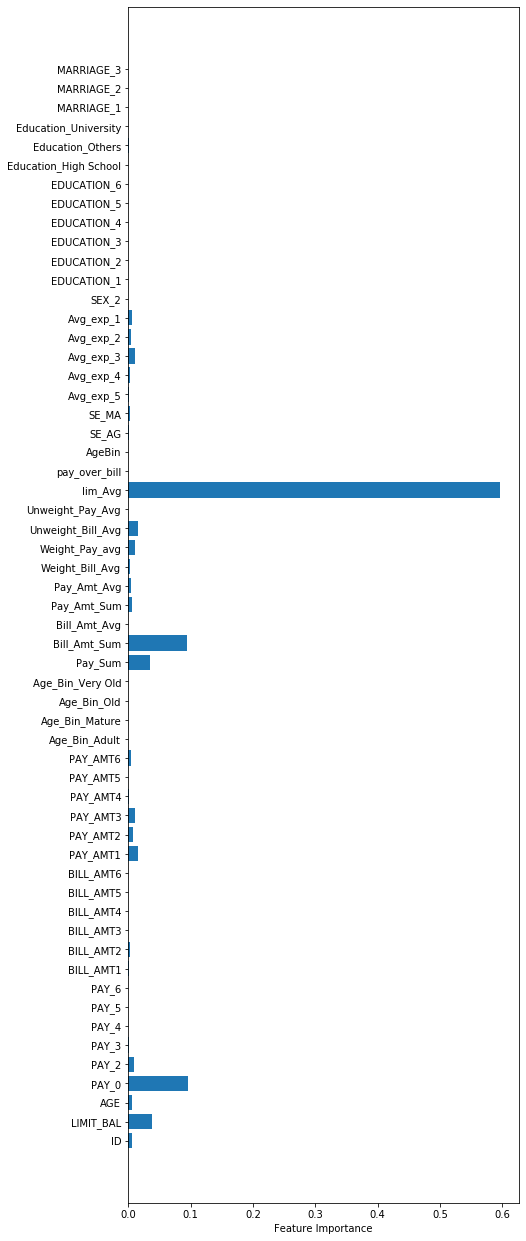

In [479]:
plt.figure(figsize=(7,22))
plt.barh(range(len(col)),dt1.feature_importances_)
plt.yticks(range(len(col)),col)
plt.xlabel('Feature Importance')

Total features used : 19
   
- Avg_exp_1 , 2, 3 , 4
- Age
- Pay_0,2
- Pay_amt 1,2,3
- Bill_sum , Pay_sum
- Weight_pay_avg
- unweight_bill_avg
- Lim_avg
- Limit_bal
- Id

#### Tuning min_sample_split

In [480]:
x_train.shape , x_val.shape

((16875, 57), (5625, 57))

In [481]:
import math

In [482]:
train_accuracy = []
validation_accuracy = []
list= []

## till Ten percentage of data
percentage = [(i/100) for i in range(1,10)]

def min_split(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)


In [483]:
min_split(x_train)

[168, 337, 506, 675, 843, 1012, 1181, 1350, 1518]

In [484]:
for split in min_split(x_train):
    dt1 = DecisionTreeClassifier(class_weight="balanced",min_samples_split=split , max_depth=6, random_state=10)
    dt1.fit(x_train, y_train)
    pred_train = dt1.predict(x_train)
    pred_val = dt1.predict(x_val)
    train_accuracy.append(f1_score(pred_train , y_train))
    validation_accuracy.append(f1_score(pred_val , y_val))

In [485]:
frame = pd.DataFrame({'percentage of data' : range(1,10) , 'min_sample_split':min_split(x_train), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,percentage of data,min_sample_split,train_acc,valid_acc
0,1,168,0.559201,0.543399
1,2,337,0.558336,0.546125
2,3,506,0.556267,0.549162
3,4,675,0.547499,0.550919
4,5,843,0.547280,0.551359
5,6,1012,0.545952,0.553997
6,7,1181,0.536430,0.537788
7,8,1350,0.521615,0.529801
8,9,1518,0.521615,0.529801


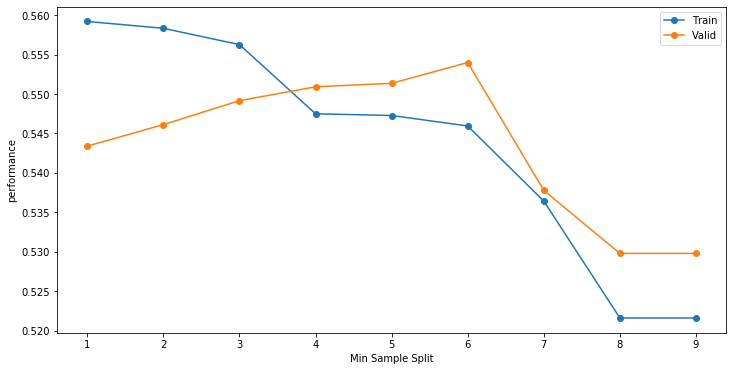

In [486]:
plt.figure(figsize=(12,6))
plt.plot(frame['percentage of data'], frame['train_acc'], marker='o')
plt.plot(frame['percentage of data'], frame['valid_acc'], marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

### 2.5 % and 3.5% of data looks promising

**Further magnifying between 2 and 4 perecnt of data**

In [491]:

## till Ten percentage of data
percentage1 = [(i/100) for i in range(2,5)]

def magnify(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage1]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)


In [492]:
train_accu = []
val_accu=[]
for split in magnify(x_train):
    dt1 = DecisionTreeClassifier(class_weight="balanced",min_samples_split=split , max_depth=6, random_state=10)
    dt1.fit(x_train, y_train)
    pred_train = dt1.predict(x_train)
    pred_val = dt1.predict(x_val)
    train_accu.append(f1_score(pred_train , y_train))
    val_accu.append(f1_score(pred_val , y_val))

In [494]:
frame = pd.DataFrame({'percentage':range(2,5),'min_sample_size':magnify(x_train), 'train_acc':train_accu, 'valid_acc':val_accu})
frame

,percentage,min_sample_size,train_acc,valid_acc
0,2,337,0.558336,0.546125
1,3,506,0.556267,0.549162
2,4,675,0.547499,0.550919


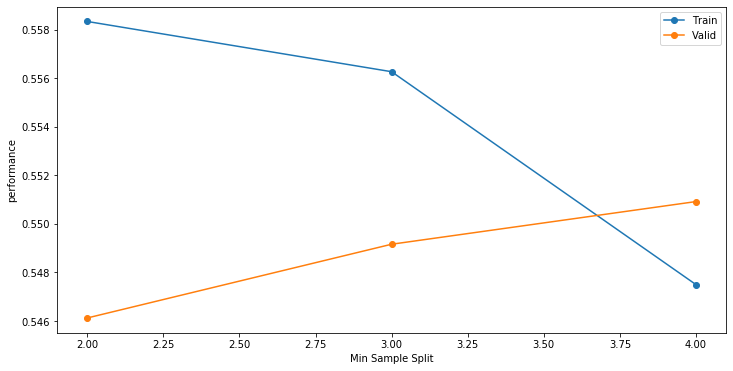

In [495]:
plt.figure(figsize=(12,6))
plt.plot(frame['percentage'], frame['train_acc'], marker='o')
plt.plot(frame['percentage'], frame['valid_acc'], marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

**3% of data seems to be a good value , here which is 506 data points roughly**

- **Running decision tree after tuning max_depth and min_sample_split**

In [496]:
dt1 = DecisionTreeClassifier(class_weight="balanced",min_samples_split = 506 , max_depth = 6 , random_state=10)

In [497]:
#fitting the model
dt1.fit(x_train, y_train)
pred_train = dt1.predict(x_train)
pred_val = dt1.predict(x_val)

In [498]:
from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.5562669293277518, 0.5491624180626365)

Text(0.5, 1.0, 'Tree')

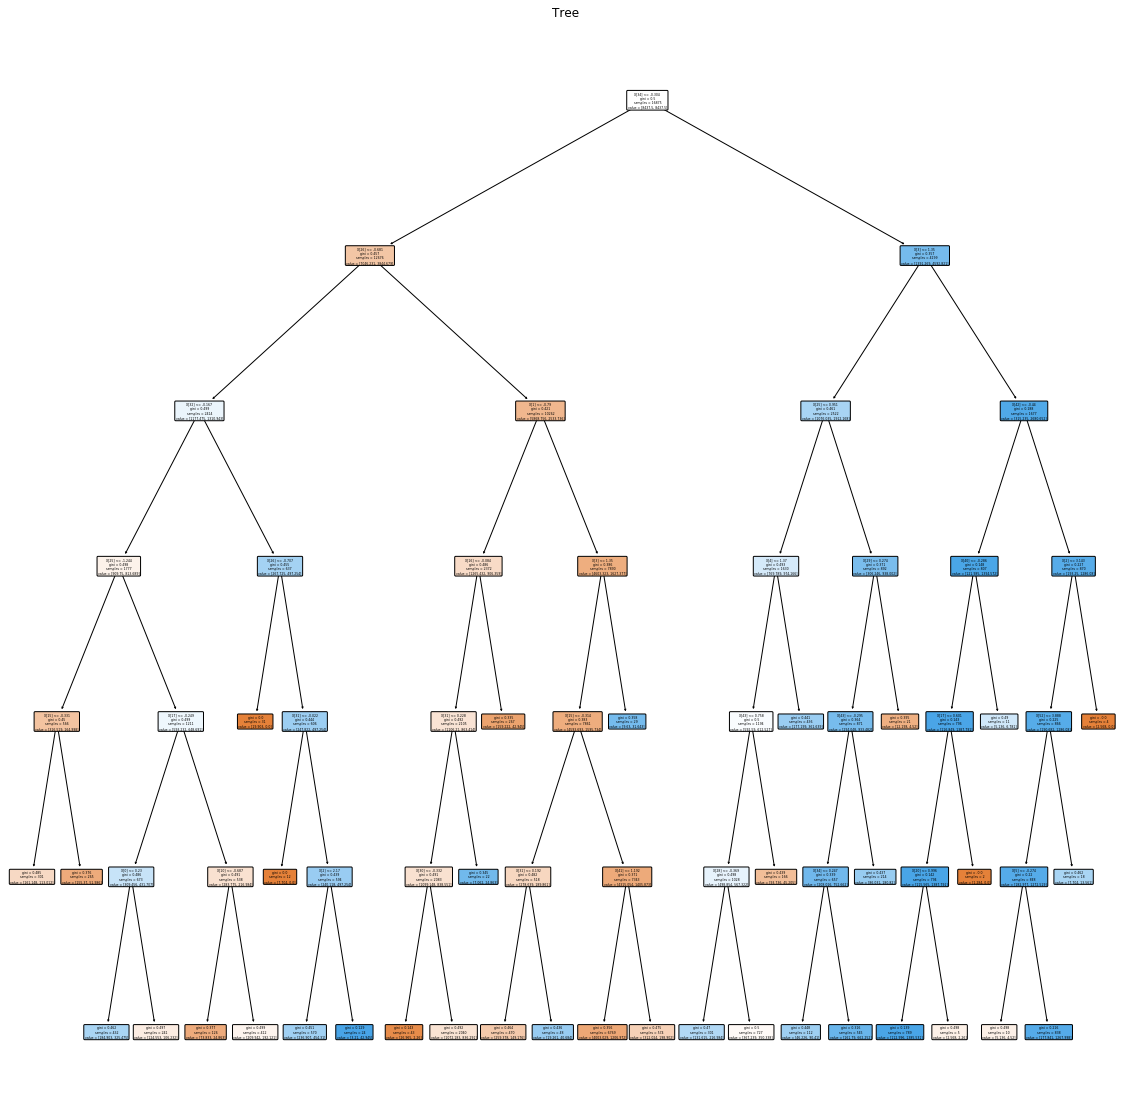

In [499]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt1, rounded=True , filled=True)
plt.title("Tree")

### Tuning of Min leaf sample

In [500]:

## till Ten percentage of data
percentage2 = [(i/200) for i in range(0,10)]
percentage2.pop(0)

def min_sample_leaf(data):
    
    multiplied_list = [element * data.shape[0] for element in percentage2]
    split_list = [math.floor(integer) for integer in multiplied_list]
    return(split_list)


In [501]:
min_sample_leaf(x_train)

[84, 168, 253, 337, 421, 506, 590, 675, 759]

In [502]:
train_accu = []
val_accu=[]
for leaf in min_sample_leaf(x_train):
    dt1 = DecisionTreeClassifier(class_weight="balanced",min_samples_leaf = leaf , min_samples_split=506 , max_depth=6, random_state=10)
    dt1.fit(x_train, y_train)
    pred_train = dt1.predict(x_train)
    pred_val = dt1.predict(x_val)
    train_accu.append(f1_score(pred_train , y_train))
    val_accu.append(f1_score(pred_val , y_val))

In [503]:
frame = pd.DataFrame({'percentage':percentage2,'min_sample_leaf':min_sample_leaf(x_train), 'train_acc':train_accu, 'valid_acc':val_accu})
frame

,percentage,min_sample_leaf,train_acc,valid_acc
0,0.005,84,0.547759,0.549489
1,0.010,168,0.542537,0.533247
2,0.015,253,0.540457,0.541037
3,0.020,337,0.533219,0.529984
4,0.025,421,0.537787,0.538386
5,0.030,506,0.535492,0.542914
6,0.035,590,0.531347,0.546006
7,0.040,675,0.530430,0.537173
8,0.045,759,0.531364,0.544781


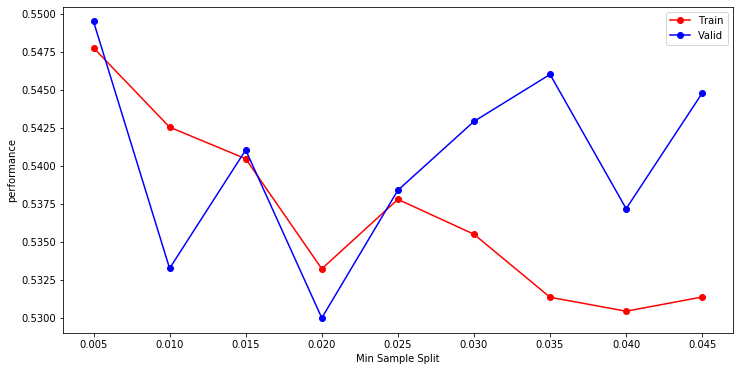

In [504]:
plt.figure(figsize=(12,6))
plt.plot(frame['percentage'], frame['train_acc'], color='red' , marker='o')
plt.plot(frame['percentage'], frame['valid_acc'], color='blue' , marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('performance')
plt.legend(["Train" , "Valid"])

**2 percent data is good for min_sample_leaf which is 337 here**

Text(0.5, 0, 'Feature Importance')

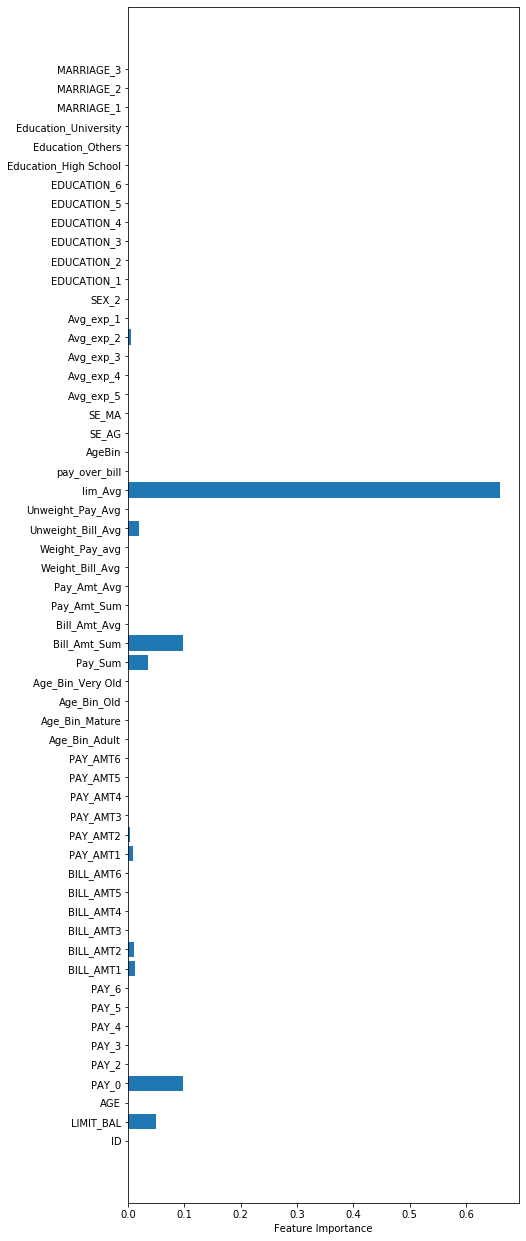

In [505]:
plt.figure(figsize=(7,22))
plt.barh(range(len(col)),dt1.feature_importances_)
plt.yticks(range(len(col)),col)
plt.xlabel('Feature Importance')

- **Important features used in tree afer tuning : 8**

#### Hypertuning Parameters at once on train and validation set

In [506]:
dt1 = DecisionTreeClassifier(class_weight="balanced",min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)

In [507]:
#fitting the model
dt1.fit(x_train, y_train)
pred_train = dt1.predict(x_train)
pred_val = dt1.predict(x_val)

In [508]:
from sklearn.metrics import f1_score
score1 = f1_score(pred_train, y_train)
score2 = f1_score(pred_val, y_val)
score1 , score2

(0.533219397564623, 0.5299843014128729)

## Tree

Text(0.5, 1.0, 'Tree')

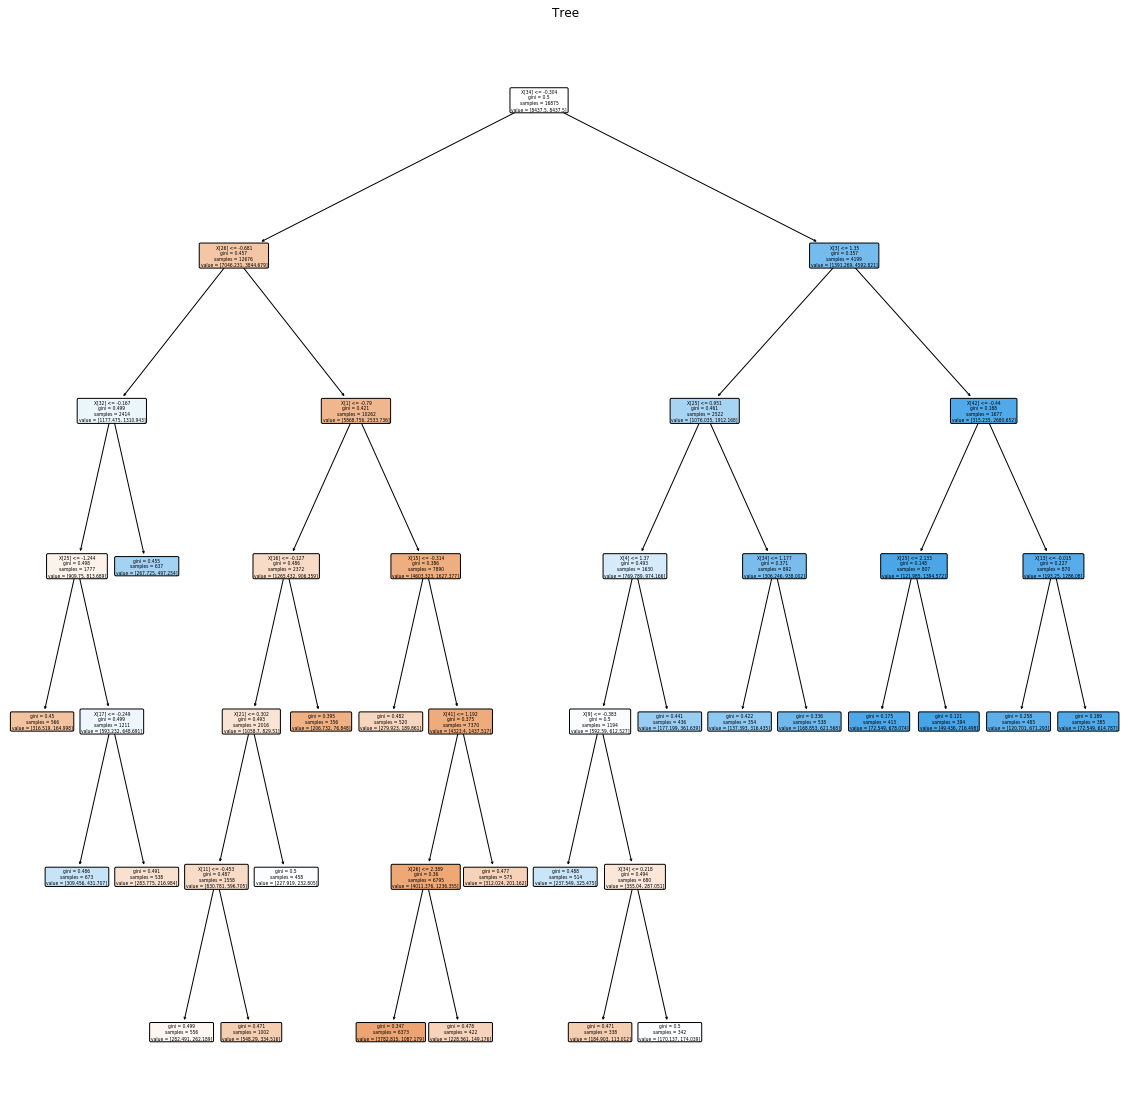

In [510]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt1, rounded=True , filled=True)
plt.title("Tree")

Text(0.5, 0, 'Feature Importance')

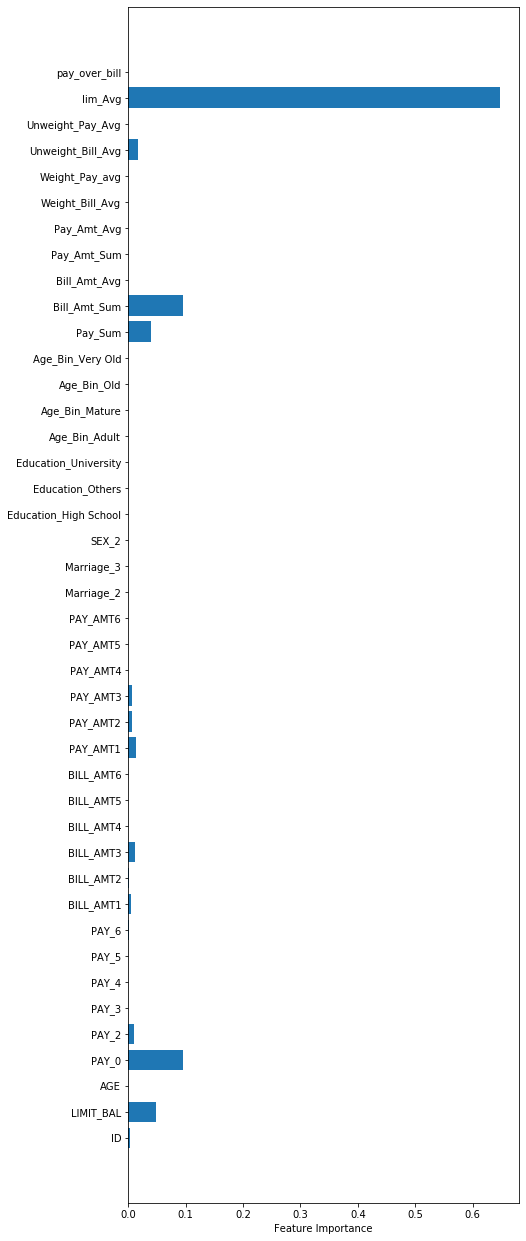

In [170]:
plt.figure(figsize=(7,22))
plt.barh(range(len(col)),dt1.feature_importances_)
plt.yticks(range(len(col)),col)
plt.xlabel('Feature Importance')

FEATURES USED BY Decision Tree :12
    
    LIM_BAL
    Pay_0 , 2
    Bill_amt1 , 3
    PAy_amt 1 , 2, 3
    pay_sum
    Bill_amt_sum
    Unweight_bill_avg
    Lim_avg

### Hypertuning values applied to testing data

In [515]:
DT = DecisionTreeClassifier(class_weight = 'balanced' , min_samples_leaf = 337 , min_samples_split = 506 , max_depth = 6 , random_state=10)

In [516]:
#fitting the model
DT.fit(train_x, train_y)
train_pred = DT.predict(train_x)
test_pred = DT.predict(test_x)

In [517]:
from sklearn.metrics import f1_score
score_train = f1_score(train_pred, train_y)
score_test = f1_score(test_pred,test_y)
score_train , score_test

(0.5375110326566636, 0.5189567087926862)

## Conclusion : Out of Logistic , knn and decision , Decision works best with Pre- Pruning

### Post-Pruning (on default valued decision tree)

In [518]:
dt = DecisionTreeClassifier(class_weight = 'balanced' ,random_state=10)

In [130]:
#fitting the model
dt.fit(x_train, y_train)
train_pred = dt.predict(x_train)
val_pred = dt.predict(x_val)

In [131]:
from sklearn.metrics import f1_score
score_train = f1_score(train_pred, y_train)
score_val = f1_score(val_pred,y_val)
score_train , score_val

(1.0, 0.41021611001964636)

#### Extracting Alphas for running Decision tree at all possible values to get optimum alpha value

In [132]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [155]:
ccp_alphas

array([0.00000000e+00, 3.88689765e-05, 3.91111111e-05, ...,
       1.42553055e-03, 3.68373320e-03, 1.14474927e-02])

#### Graph of How Leaves result in more impurity on changing alphas 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

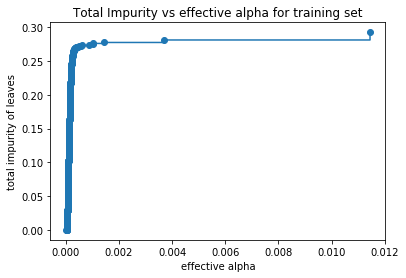

In [133]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#### Running Decision Tree on all possible values of alphas

In [134]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05194620119294374


In [135]:
clfs

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=3.886897650338511e-05, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=3.911111111111119e-05, class_weight=None,
                        criterion='gini', ma

#### Graph of how nodes and depth changes with changing alphas

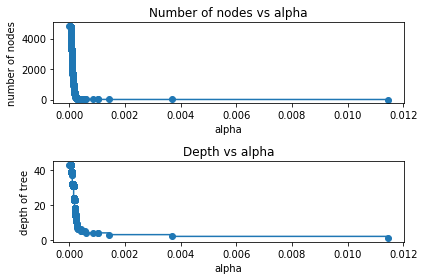

In [140]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
#fitting the model
dt.fit(x_train, y_train)
train_pred = dt.predict(x_train)
val_pred = dt.predict(x_val)

from sklearn.metrics import f1_score
score_train = f1_score(train_pred, y_train)
score_val = f1_score(val_pred,y_val)
score_train , score_val

In [152]:
train_scores1 = []
for clf in clfs:
    clf.fit(x_train , y_train)
    train_scores1.append(f1_score(clf.predict(x_train), y_train))

In [153]:
val_scores = []
for clf in clfs:
    clf.fit(x_val , y_val)
    val_scores.append(f1_score(clf.predict(x_val), y_val))

### Graph of changing F1_score with Alphas for train and validation set

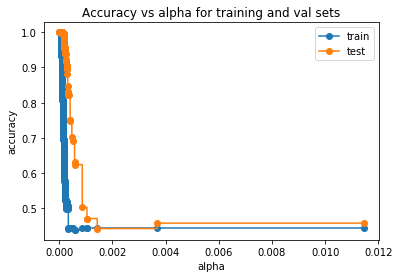

In [154]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and val sets")
ax.plot(ccp_alphas, train_scores1, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### ccp_alpha = 0.0015 looks good.

Running on testing data with ccp-alpha value

In [156]:
dm = DecisionTreeClassifier(ccp_alpha = 0.0015, random_state=10)

In [157]:
#fitting the model
dm.fit(train_x, train_y)
train_pred = dm.predict(train_x)
test_pred = dm.predict(test_x)

In [158]:
from sklearn.metrics import f1_score
score_train = f1_score(train_pred, train_y)
score_test = f1_score(test_pred,test_y)
score_train , score_test

(0.44798041615667084, 0.4392871943638625)

# Conclusion

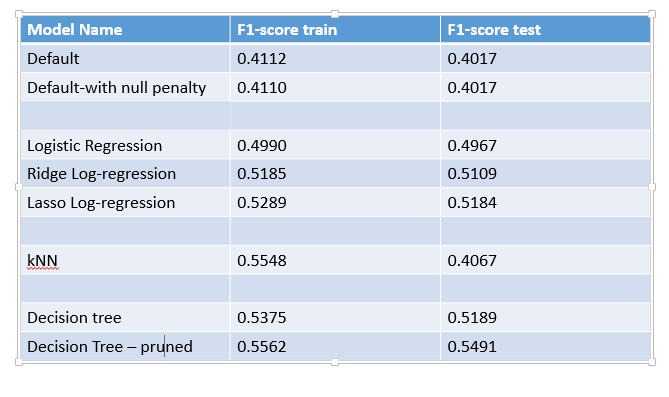